In [12]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

#Data for Gas Emissions by the Whole World

gas_df = pd.read_csv("https://ourworldindata.org/grapher/annual-co2-gas.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
gas_metadata = requests.get("https://ourworldindata.org/grapher/annual-co2-gas.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [13]:
print(json.dumps(gas_metadata, indent=4, sort_keys=True))

{
    "activeFilters": {},
    "chart": {
        "citation": "Global Carbon Budget (2024)",
        "originalChartUrl": "https://ourworldindata.org/grapher/annual-co2-gas?v=1&csvType=full&useColumnShortNames=true",
        "selection": [
            "Germany",
            "United States",
            "United Kingdom",
            "Canada",
            "European Union (27)",
            "India",
            "Indonesia",
            "South Africa",
            "Russia"
        ],
        "title": "Annual CO\u2082 emissions from gas"
    },
    "columns": {
        "emissions_from_gas": {
            "citationLong": "Global Carbon Budget (2024) \u2013 with major processing by Our World in Data. \u201cAnnual CO\u2082 emissions from gas \u2013 GCB\u201d [dataset]. Global Carbon Project, \u201cGlobal Carbon Budget\u201d [original data].",
            "citationShort": "Global Carbon Budget (2024) \u2013 with major processing by Our World in Data",
            "descriptionKey": [
            

In [14]:
#Also have csv file data
csv_df= pd.read_csv('/Users/lisatafoya/Downloads/annual-co2-gas/annual-co2-gas.csv')
csv_df.head()

,Entity,Code,Year,Annual CO₂ emissions from gas
0,Afghanistan,AFG,1949,0.0
1,Afghanistan,AFG,1950,0.0
2,Afghanistan,AFG,1951,0.0
3,Afghanistan,AFG,1952,0.0
4,Afghanistan,AFG,1953,0.0


In [15]:
csv_df = csv_df.set_index("Entity")

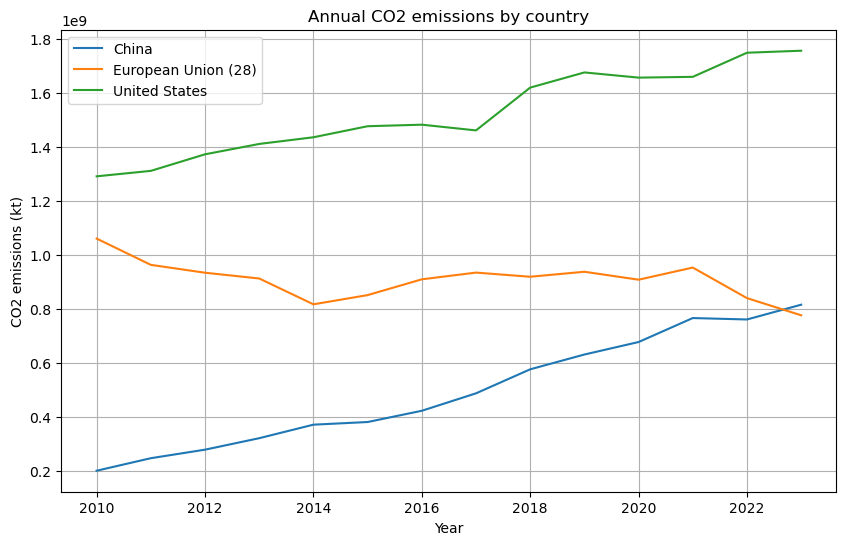

In [17]:
# Create a line graph of annual CO2 emissions by country.
import matplotlib.pyplot as plt
# Filter the data to only include 1995 and later.
df = gas_df[gas_df.Year >= 2010]
# Filter the country to only include United States, Russia, China, India, United Kingdom and the European Union
df = df[df.Entity.isin(["United States","China", "European Union (28)"])]
# Pivot the data so that each country is a column. 
df = df.pivot(index="Year", columns="Entity", values="emissions_from_gas")
# Create a line graph of the data.
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title("Annual CO2 emissions by country")
plt.xlabel("Year")
plt.ylabel("CO2 emissions (kt)")
plt.legend(df.columns)
plt.grid(True)
plt.show()
